<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b>Reviewer's comment</b>

Hi Michael, my name is Victor (my handle on Discord is `camargo.victor`). Thank you for your thoughtful updates — you’ve addressed all the previous comments, including the final request to calculate the sMAPE for the test set. Excellent work!

✅ I’ve reviewed your changes, and everything looks good. Your project is now **ready for approval**.

Before we wrap up, I want to once again highlight the great practices you've demonstrated:

<div style="border: 5px solid green; padding: 15px; margin: 5px">

- Clear and relevant project introduction  
- Effective data validation using domain-specific calculations  
- Clean handling of missing data  
- Insightful exploratory analysis with histogram visuals  
- Proper comparison of training vs. test set distributions  
- Precise implementation of the sMAPE function  
- A wide range of well-tuned models  
- Careful metric analysis and thoughtful conclusions  

🌟 Your final conclusion brings the project together in a very professional and accessible way — nicely done!

</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">

You’ve also done a great job considering my optimization suggestions. While not mandatory, they can enhance future projects if you decide to explore them.

</div>

<hr>

<font color='dodgerblue'>**To sum up:**</font> Congratulations on a strong submission! Your work reflects good understanding, technical skill, and attention to feedback. Keep up the great work! 🎉

If you have any questions or would like to continue refining this or future projects, I’m happy to help. And as always, feel free to reach out via Discord or book a session if needed.

<hr>

✍️ Here’s a great read you may enjoy: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482)  
📌 You’re also welcome to join our daily coworking sessions or book 1:1 time with tutors [here](https://calendly.com/tripleten-ds-experts-team)

</div>


# Integrated Project 2: Building a Model to Predict the Amount of Gold Recovered from Gold Ore

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_source = pd.read_csv('/datasets/gold_recovery_full.csv')
pd.set_option('display.max_rows', None)

In [3]:
#Checking that recovery is calculated correctly
recovery = df_train['rougher.output.recovery']
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']
calculated_recovery = ((c * (f - t))/(f * (c - t))) * 100
recovery_df = pd.DataFrame({'calculated': calculated_recovery, 'provided': recovery})
clean_recovery_df = recovery_df.dropna()
print(mean_absolute_error(clean_recovery_df['provided'], clean_recovery_df['calculated']))

9.303415616264301e-15


The MAE between my calculated recovery value and the provided recovery value is less than 0.000000000000001, meaning the recovery is being calculated correctly in the training set.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Great! The data was validated successfully. It means that we have the correct data. 
  
</div>

In [4]:
print(df_train.columns.nunique(), df_test.columns.nunique(), df_source.columns.nunique())

87 53 87


In [5]:
df_train.shape

(16860, 87)

In [6]:
df_test.shape

(5856, 53)

In [7]:
df_source.shape

(22716, 87)

In [8]:
#Confirming target columns aren't in the test df
target_columns = ['rougher.output.recovery', 'final.output.recovery']
for column in target_columns:
    if column in df_test.columns:
        print('Target columns are present')
    else:
        print('Target columns are not present')

Target columns are not present
Target columns are not present


In [9]:
#Finding out what columns are missing from the test df that are in the train df
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)
not_in_test = train_columns - test_columns
for column in sorted(not_in_test):
    print(column, type(column))

final.output.concentrate_ag <class 'str'>
final.output.concentrate_au <class 'str'>
final.output.concentrate_pb <class 'str'>
final.output.concentrate_sol <class 'str'>
final.output.recovery <class 'str'>
final.output.tail_ag <class 'str'>
final.output.tail_au <class 'str'>
final.output.tail_pb <class 'str'>
final.output.tail_sol <class 'str'>
primary_cleaner.output.concentrate_ag <class 'str'>
primary_cleaner.output.concentrate_au <class 'str'>
primary_cleaner.output.concentrate_pb <class 'str'>
primary_cleaner.output.concentrate_sol <class 'str'>
primary_cleaner.output.tail_ag <class 'str'>
primary_cleaner.output.tail_au <class 'str'>
primary_cleaner.output.tail_pb <class 'str'>
primary_cleaner.output.tail_sol <class 'str'>
rougher.calculation.au_pb_ratio <class 'str'>
rougher.calculation.floatbank10_sulfate_to_au_feed <class 'str'>
rougher.calculation.floatbank11_sulfate_to_au_feed <class 'str'>
rougher.calculation.sulfate_to_au_concentrate <class 'str'>
rougher.output.concentrate_a

In [10]:
#No need to run during review, checking for comparison
#df_test.info()

After examining the features that are not present in the test set, we see that they are all either an output feature or a calculated feature. This makes sense that they would not be present in the training set as there would be no way to know the outputs without first having the inputs, and the same logic applies for the calculated features as well. They are all float64 types, which also makes sense as in the dataset they are all numbers that extend into mulitple decimal places for measurement values.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    
You have successfully found missing columns! It is important to note that there are columns in the training set that are not available in the test set. These are the values obtained after the process is complete. Therefore, we need to make sure we don't use them during the training to avoid data leakage.

    
</div>

### Preprocessing the Data

In [11]:
print(df_train['date'].dtype, df_test['date'].dtype, df_source['date'].dtype)

object object object


In [12]:
#Converting all 3 date columns to datetime format
for df in [df_train, df_test, df_source]:
    df['date'] = pd.to_datetime(df['date'])
print(df_train['date'].dtype, df_test['date'].dtype, df_source['date'].dtype)

datetime64[ns] datetime64[ns] datetime64[ns]


In [13]:
#Searching for missing data, feel free to run the next three blocks if needed during review
#df_train.isna().sum()/len(df_train) * 100

In [14]:
#df_test.isna().sum()/len(df_test) * 100

In [15]:
#df_source.isna().sum()/len(df_source) * 100

In [16]:
print(df_train.duplicated().sum(), df_test.duplicated().sum(), df_source.duplicated().sum())

0 0 0


No duplicated data but definitely some missing data we need to handle

In [17]:
target_cols = ['rougher.output.recovery', 'final.output.recovery']
df_train = df_train.dropna(subset = target_cols)
feature_cols = [col for col in df_train.columns if col not in target_cols]

for col in feature_cols:
    if df_train[col].isna().sum()/len(df_train) * 100 < 10:
        df_train[col].fillna(df_train[col].median(), inplace = True)
        
train_cols_missing = [col for col in feature_cols if df_train[col].isna().any()]
common_cols = [col for col in train_cols_missing if col in df_test.columns]

if common_cols:
    knn_imputer = KNNImputer(n_neighbors = 5)
    df_train[common_cols] = knn_imputer.fit_transform(df_train[common_cols])

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!
    
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    

    
I recommend deleting missing values in target columns before you fill in the gaps. We should only impute features, not targets. If we fill in the gaps in targets, we may introduce noise and incorrect labels, which may mislead us about how well the model performs.  
    
</div>

In [18]:
#Confirming the fillna for loop works, no need to run during review
#df_train.isna().sum()

In [19]:
for col in common_cols:
    if df_test[col].isna().sum()/len(df_test) * 100 < 10:
        df_test[col].fillna(df_test[col].median(), inplace = True)

test_cols_missing = [col for col in common_cols if df_test[col].isna().any()]
if test_cols_missing:
    df_test_imputed = pd.DataFrame(knn_imputer.fit_transform(df_test[common_cols]), columns = common_cols, index = df_test.index)
    df_test[test_cols_missing] = df_test_imputed[test_cols_missing]

In [20]:
feature_cols = df_test.select_dtypes(include = 'number').columns

for col in feature_cols:
    if df_test[col].isna().sum()/len(df_test) * 100 < 10:
        df_test[col].fillna(df_test[col].median(), inplace = True)

if df_test[feature_cols].isna().any().any():
    df_test_imputed = pd.DataFrame(knn_imputer.fit_transform(df_test[feature_cols]), columns = feature_cols, index = df_test.index)
    df_test[feature_cols] = df_test_imputed

In [21]:
#Confirming the fillna for loop works, no need to run during review
#df_test.isna().sum()

### Concentration of Au, Ag, and Pb at the different purification stages

In [22]:
avg_rougher_au_input = df_train['rougher.input.feed_au'].mean()
avg_rougher_ag_input = df_train['rougher.input.feed_ag'].mean()
avg_rougher_pb_input = df_train['rougher.input.feed_pb'].mean()
print(avg_rougher_au_input, avg_rougher_ag_input, avg_rougher_pb_input)

7.866576841919407 8.579195196596277 3.5220706193729803


In [23]:
avg_au_primary = df_train['primary_cleaner.output.concentrate_au'].mean()
avg_ag_primary = df_train['primary_cleaner.output.concentrate_ag'].mean()
avg_pb_primary = df_train['primary_cleaner.output.concentrate_pb'].mean()
print(avg_au_primary, avg_ag_primary, avg_pb_primary)

32.386835978391346 8.200915815165981 9.59095685721399


In [24]:
avg_rougher_au_output = df_train['rougher.output.concentrate_au'].mean()
avg_rougher_ag_output = df_train['rougher.output.concentrate_ag'].mean()
avg_rougher_pb_output = df_train['rougher.output.concentrate_pb'].mean()
print(avg_rougher_au_output, avg_rougher_ag_output, avg_rougher_pb_output)

19.43995785143646 11.775812314356036 7.664554751481546


In [25]:
avg_au_final = df_train['final.output.concentrate_au'].mean()
avg_ag_final = df_train['final.output.concentrate_ag'].mean()
avg_pb_final = df_train['final.output.concentrate_pb'].mean()
print(avg_au_final, avg_ag_final, avg_pb_final)

44.00379162105571 5.142023229896205 10.13297126798245


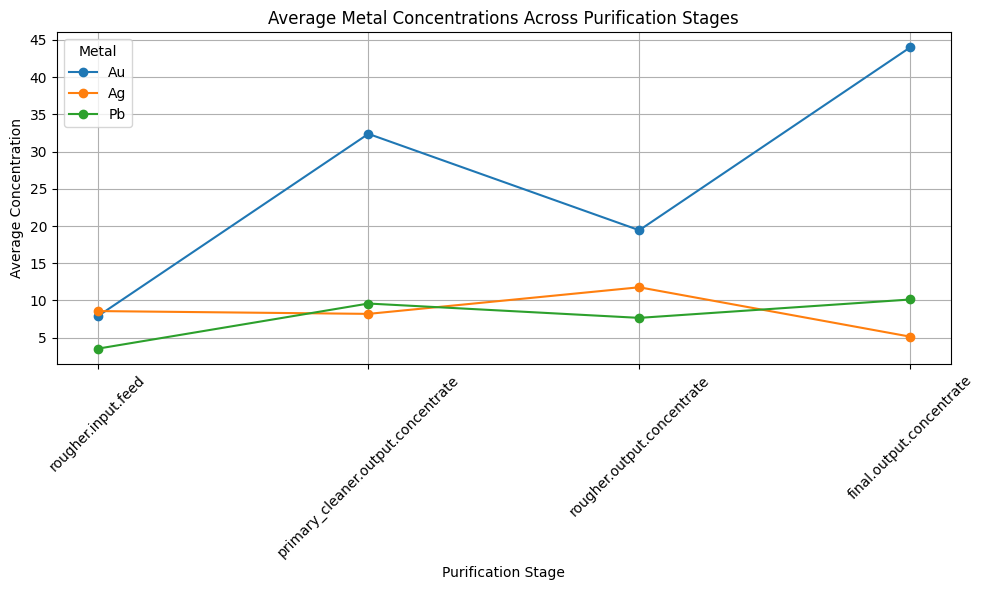

In [26]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed', 'primary_cleaner.output.concentrate', 'rougher.output.concentrate', 'final.output.concentrate']

means = {metal: [] for metal in metals}

for metal in metals:
    for stage in stages:
        col_name = f'{stage}_{metal}'
        means[metal].append(df_train[col_name].mean())

plt.figure(figsize=(10, 6))

for metal, values in means.items():
    plt.plot(stages, values, marker = 'o', label = metal.title())

plt.xticks(rotation = 45)
plt.xlabel('Purification Stage')
plt.ylabel('Average Concentration')
plt.title('Average Metal Concentrations Across Purification Stages')
plt.legend(title = 'Metal')
plt.grid(True)
plt.tight_layout()
plt.show()

From these calculations, we can see that at each step of the purification process (rougher input, primary cleaning, rougher output, and final output), the average gold (Au) concentrate rises nearly fourfold, is reduced by a little less than half, then more than doubles on final output. The average lead (Pb) and silver (Ag) concentrates are relatively low compared to the gold concentrate, which is already great to see, but by the time we are at the final output their concentrations have not changed too much, which leads me to believe the gold purification process is running pretty efficiently.

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    

Let's analyze histograms as well.  For this purpose, please use `rougher.input.feed_`,  `primary_cleaner.output.concentrate_`, `rougher.output.concentrate_`, and `final.output.concentrate_` columns for each of the three metals and call the `hist` method. We need to see how concentration changes from stage to stage for each metal.


</div>

<div class="alert alert-block alert-info">
I know you mentioned using the hist method here, but plotting on a line graph seemed to be very simple and easy to read for me, I can adjust if needed!
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Understood. However, these line plots only show you the averages. The average is not a distribution. It actually does not tell us much. When you need to analyze distributions, use histograms. For instance:   
</div>

Text(0.5, 1.0, 'Gold concentration change')

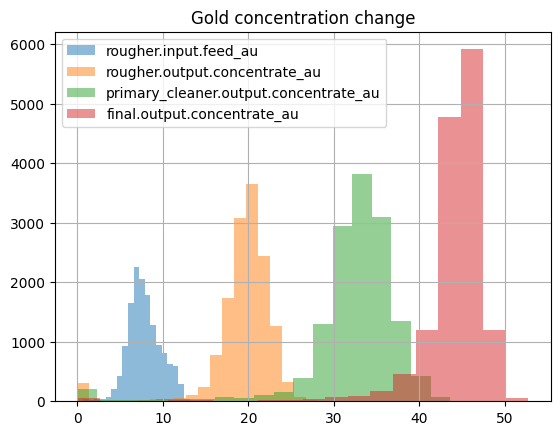

In [27]:
# Reviewer's code 2 

stages = ['rougher.input.feed_{}','rougher.output.concentrate_{}','primary_cleaner.output.concentrate_{}','final.output.concentrate_{}',]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in stages]
    for stage in steps:
        df_train[stage].hist(alpha=0.5, bins=20)
    plt.legend(steps)

plot_concentrate_progress('au')
plt.title('Gold concentration change')

### Visualization of Feed Particle Size Distributions between Training and Test Sets

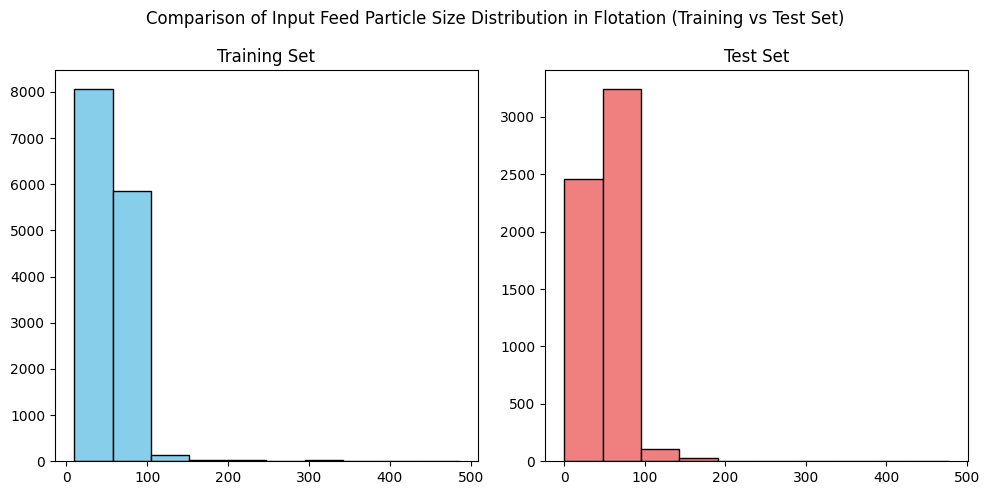

In [28]:
data1 = df_train['rougher.input.feed_size']
data2 = df_test['rougher.input.feed_size']
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data1, bins=10, color='skyblue', edgecolor='black')
axes[1].hist(data2, bins=10, color='lightcoral', edgecolor='black')
fig.suptitle("Comparison of Input Feed Particle Size Distribution in Flotation (Training vs Test Set)")
axes[0].set_title("Training Set")
axes[1].set_title("Test Set")
plt.tight_layout()
plt.show()

In [29]:
print(df_train['rougher.input.feed_size'].describe(), df_test['rougher.input.feed_size'].describe())

count    14149.000000
mean        60.062311
std         22.309171
min          9.659576
25%         48.994530
50%         55.373885
75%         65.918384
max        484.967466
Name: rougher.input.feed_size, dtype: float64 count    5856.000000
mean       55.915236
std        22.684428
min         0.046369
25%        43.898467
50%        50.002004
75%        61.608216
max       477.445473
Name: rougher.input.feed_size, dtype: float64


Although to the eye these two graphs don't look identical, using describe( ) on both columns reveals that they have very similar means, standard deviations, and quartile values. The biggest difference is the minimum values for each column, but in context of the entire column, a difference of 9 isn't enough to warrant any large amount of concern.

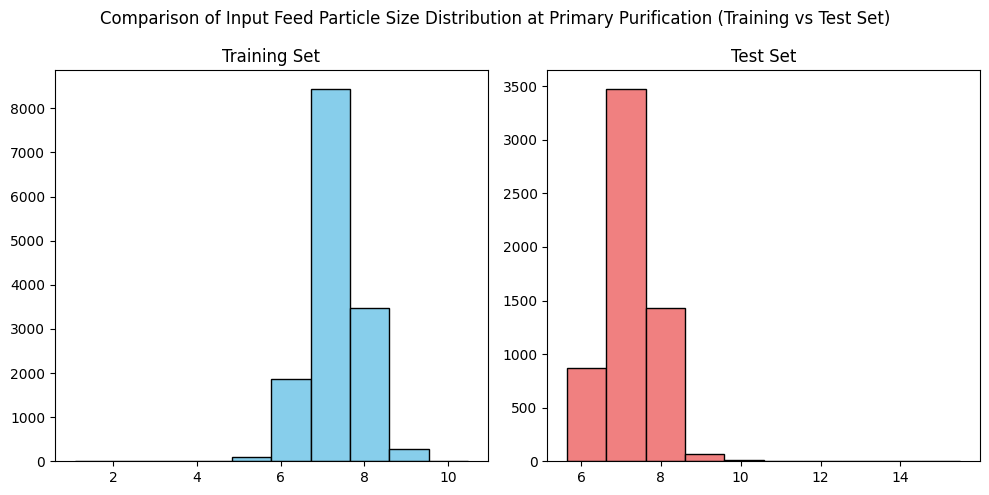

In [30]:
data3 = df_train['primary_cleaner.input.feed_size']
data4 = df_test['primary_cleaner.input.feed_size']
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(data3, bins=10, color='skyblue', edgecolor='black')
axes[1].hist(data4, bins=10, color='lightcoral', edgecolor='black')
fig.suptitle("Comparison of Input Feed Particle Size Distribution at Primary Purification (Training vs Test Set)")
axes[0].set_title("Training Set")
axes[1].set_title("Test Set")
plt.tight_layout()
plt.show()

In [31]:
print(df_train['primary_cleaner.input.feed_size'].describe(), df_test['primary_cleaner.input.feed_size'].describe())

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64 count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64


Comparing the input feed particle size at the first purification step, these plots look extremely similar to each other, which is confirmed by running describe( ) on both columns that were plotted. Again, only one point stands out; the maximum value, as there is a relatively large gap between both datasets, but the quartile values are similar enough that I feel confident the distributions don't vary that much between the two.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
     
Well done! 
</div>

In [32]:
df_train['raw_feed_total'] = (df_train['rougher.input.feed_ag'] +
                              df_train['rougher.input.feed_pb'] +
                              df_train['rougher.input.feed_au'] +
                              df_train['rougher.input.feed_sol']
                             )          
df_train['rougher_concentrate_total'] = (df_train['rougher.output.concentrate_ag'] +
                                         df_train['rougher.output.concentrate_pb'] +
                                         df_train['rougher.output.concentrate_au'] +
                                         df_train['rougher.output.concentrate_sol']
                                        )
df_train['final_concentrate_total'] = (df_train['final.output.concentrate_ag'] +
                                       df_train['final.output.concentrate_pb'] +
                                       df_train['final.output.concentrate_au'] +
                                       df_train['final.output.concentrate_sol']
                                       )

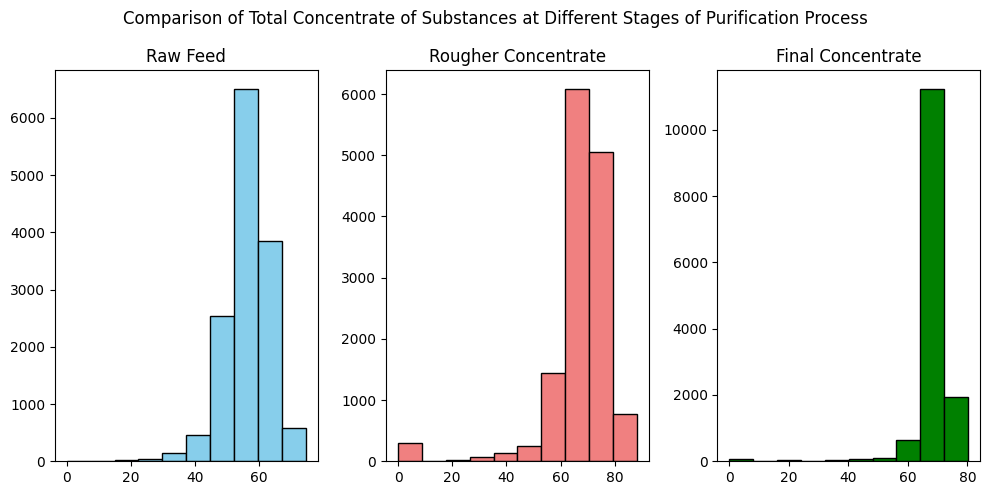

In [33]:
data5 = df_train['raw_feed_total']
data6 = df_train['rougher_concentrate_total']
data7 = df_train['final_concentrate_total']
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].hist(data5, bins = 10, color = 'skyblue', edgecolor = 'black')
axes[1].hist(data6, bins = 10, color = 'lightcoral', edgecolor = 'black')
axes[2].hist(data7, bins = 10, color = 'green', edgecolor = 'black')
fig.suptitle("Comparison of Total Concentrate of Substances at Different Stages of Purification Process")
axes[0].set_title("Raw Feed")
axes[1].set_title("Rougher Concentrate")
axes[2].set_title("Final Concentrate")
plt.tight_layout()
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
     
Correct! 

</div>

In [34]:
print(df_train['raw_feed_total'].describe(), df_train['rougher_concentrate_total'].describe(), df_train['final_concentrate_total'].describe())

count    14149.000000
mean        56.284337
std          6.974040
min          0.040000
25%         52.613122
50%         56.627132
75%         60.771094
max         74.458253
Name: raw_feed_total, dtype: float64 count    14149.000000
mean        67.184525
std         12.694389
min          0.000000
25%         64.922384
50%         69.175954
75%         73.428728
max         88.140119
Name: rougher_concentrate_total, dtype: float64 count    14149.000000
mean        68.476306
std          6.976268
min          0.000000
25%         67.648606
50%         69.165188
75%         70.977986
max         80.210644
Name: final_concentrate_total, dtype: float64


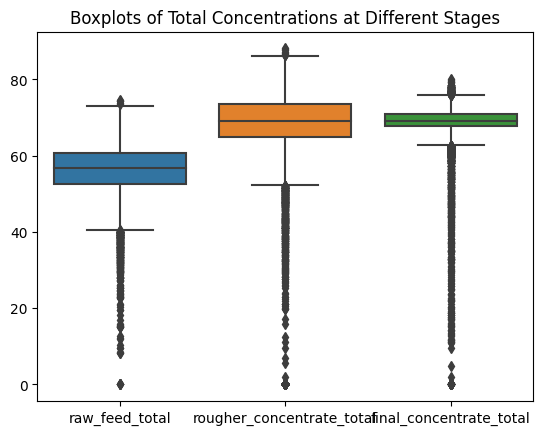

In [35]:
data = df_train[['raw_feed_total', 'rougher_concentrate_total', 'final_concentrate_total']]
sns.boxplot(data = data)
plt.title("Boxplots of Total Concentrations at Different Stages")
plt.show()

Taking a closer look at the boxplots for each stage of the purification process, the outliers at the high end of the rougher_concentrate_total column stand out to me as potential outliers to remove from our dataset. I believe we should treat these values as anomalies and eliminate them, that way the performance of the model can be improved even further. To do this I will use the interquartile range (IQR) method, which takes the differnce between the 25th and 75th percentiles, then treats any value above the 75th percentile + 1.5 times that calculated difference as an outlier and allows for easy removal from the dataframe

In [36]:
q1 = df_train['rougher_concentrate_total'].quantile(0.25)
q3 = df_train['rougher_concentrate_total'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR
df_train = df_train[df_train['rougher_concentrate_total'] <= upper_limit]

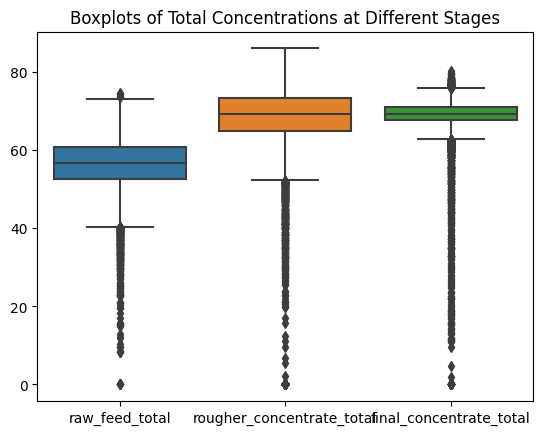

In [37]:
data = df_train[['raw_feed_total', 'rougher_concentrate_total', 'final_concentrate_total']]
sns.boxplot(data = data)
plt.title("Boxplots of Total Concentrations at Different Stages")
plt.show()

Now we've eliminated the anomalies from the rougher_concentrate_total column

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Makes sense! 
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>

  
IQR is often used to determine outliers in the normal distribution. Please keep in mind that not everything outside the boxplot whiskers is outlier. Likewise, not everything within whiskers is a normal data. This is because the whisker goes either to the maximum (minimum) or to 1.5 times the length of the box. The concentration of circles after the whiskers can be very high. Cutting off the whiskers, we can sometimes lose important information, as our sample can be really biased. I recommend that you drop them manually. For instance, you can exclude everything below 2 or 3. 
</div>


### Building a sMAPE Function and Baseline Model

In [38]:
#Recomputing columns to drop after imputing earlier on
target_cols = ['rougher.output.recovery', 'final.output.recovery']
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

not_in_test = train_columns - test_columns
cols_to_drop = [col for col in not_in_test if col not in target_cols]

df_train = df_train.drop(columns = cols_to_drop)

features = df_train.drop(columns = target_cols)
target = df_train[target_cols]
print(features.shape, target.shape)

(14140, 53) (14140, 2)


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!

</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Before modeling, we need to drop columns that are not included in the test set from the training set because these are acquired after the process is finished, so we cannot use them during the training because it will mean data leakage. Hint: you will have ~52 columns in the training data apart from 2 targets. 

</div>


In [39]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 2356
)
print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)

(10605, 53) (3535, 53) (10605, 2) (3535, 2)


Split the training set into a 3:1 ratio before building the sMAPE function and models. Next I'll create a function that returns the mean values for the target columns to get a baseline check for the sMAPE function I'll build.

In [40]:
#setting start_date variable for later use in the model testing, converting 'date' column to a numerical value that the models can use for learning
start_date = features_train['date'].min()
features_train['days_since_start'] = (features_train['date'] - features_train['date'].min()).dt.days
features_valid['days_since_start'] = (features_valid['date'] - features_train['date'].min()).dt.days
features_train = features_train.drop(columns = ['date'])
features_valid = features_valid.drop(columns = ['date'])
def smape(target, predictions):
    target = np.asarray(target)
    predict = np.asarray(predictions)

    error = 0
    for i in range(len(target)):
        denominator = (abs(target[i]) + abs(predictions[i])) / 2
        if denominator != 0:
            error += (abs(target[i] - predictions[i]) / denominator) * 100
    return error / target.shape[0]

def mean_prediction_model(target):
    mean_value = target.mean()
    return np.full(shape=target.shape, fill_value=mean_value)

def baseline_smape_scores(rougher_target, final_target):
    rougher_pred = mean_prediction_model(rougher_target)
    final_pred = mean_prediction_model(final_target)

    smape_rougher = smape(rougher_target.values, rougher_pred)
    smape_final = smape(final_target.values, final_pred)

    return smape_rougher, smape_final

def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

#Testing sMAPE functions using the baseline model
rougher_target = df_train['rougher.output.recovery']
final_target = df_train['final.output.recovery']

smape_rough, smape_final = baseline_smape_scores(rougher_target, final_target)
total_baseline_smape = total_smape(smape_rough, smape_final)

print("Baseline Total sMAPE:", total_baseline_smape)

Baseline Total sMAPE: 11.263197945737668


/tmp/ipykernel_33/13106401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train['days_since_start'] = (features_train['date'] - features_train['date'].min()).dt.days
/tmp/ipykernel_33/13106401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid['days_since_start'] = (features_valid['date'] - features_train['date'].min()).dt.days


Using the mean prediction model, we can see our Final Baseline sMAPE value is 11.26. In the models I train next, I'll be looking to reduce those values and bring them closer to 0 so that we can more accurately predict the amount of gold recovered from gold ore.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have correctly implemented the sMAPE functions, well done!     

</div>


### Training Different Models with the sMAPE Function

#### Model 1: Linear Regression

In [41]:
model_rougher = LinearRegression()
model_final = LinearRegression()

model_rougher.fit(features_train, target_train['rougher.output.recovery'])
model_final.fit(features_train, target_train['final.output.recovery'])

pred_rougher = model_rougher.predict(features_valid)
pred_final = model_final.predict(features_valid)

true_rougher = target_valid.iloc[:,0]
true_final = target_valid.iloc[:,1]

smape_rougher = smape(true_rougher, pred_rougher)
smape_final = smape(true_final, pred_final)

linreg_total_smape = total_smape(smape_rougher, smape_final)

print("Total sMAPE of Linear Regression Model:", linreg_total_smape)

Total sMAPE of Linear Regression Model: 9.00558939587434


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!

</div>

In [42]:
linreg_rougher_score = cross_val_score(model_rougher, features_train, target_train['rougher.output.recovery'], cv = 5)
linreg_final_score = cross_val_score(model_final, features_train, target_train['final.output.recovery'], cv = 5)
final_linreg_rougher_score = sum(linreg_rougher_score) / len(linreg_rougher_score)
final_linreg_final_score = sum(linreg_final_score) / len(linreg_final_score)
total_linreg_score = ((0.25 * final_linreg_rougher_score) + (0.75 * final_linreg_final_score)) * 100
total_linreg_score

28.854947727334334

A very simple Linear Regression model already shows a modest improvement over our baseline model, with the Final sMAPE value calculated at 9.01 and the final cross validation score was 28.85. Next I'll try a Decision Tree Regression model and see how it compares to the baseline and Linear Regression model

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Please note that you need to multiply by 100 :) </div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
The results will change after you fix the data leakage issue.
</div>


#### Model 2: Decision Tree Regression

In [43]:
dtree_results = []
for depth in range(2, 21, 2):
    dtree_rougher = DecisionTreeRegressor(random_state = 2356, max_depth = depth)
    dtree_final = DecisionTreeRegressor(random_state = 2356, max_depth = depth)

    dtree_rougher.fit(features_train, target_train['rougher.output.recovery'])
    dtree_final.fit(features_train, target_train['final.output.recovery'])

    dtree_rougher_preds = dtree_rougher.predict(features_valid)
    dtree_final_preds = dtree_final.predict(features_valid)

    dtree_smape_rougher = smape(target_valid['rougher.output.recovery'], dtree_rougher_preds)
    dtree_smape_final = smape(target_valid['final.output.recovery'], dtree_final_preds)

    dtree_total_smape = total_smape(dtree_smape_rougher, dtree_smape_final)
    dtree_results.append((depth, dtree_total_smape))
    print(depth, dtree_total_smape)

2 9.93917663654865
4 9.195442613341875
6 8.757491038934502
8 8.427865612369441
10 7.977565901730235
12 8.03905781923088
14 8.251413676910797
16 8.49230775750239
18 8.297305397245985
20 8.226829847212235


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct!

</div>

In [44]:
dtree_rougher_score = cross_val_score(dtree_rougher, features_train, target_train['rougher.output.recovery'], cv = 5)
dtree_final_score = cross_val_score(dtree_final, features_train, target_train['final.output.recovery'], cv = 5)
final_dtree_rougher_score = sum(dtree_rougher_score) / len(dtree_rougher_score)
final_dtree_final_score = sum(dtree_final_score) / len(dtree_final_score)
total_dtree_score = ((0.25 * final_dtree_rougher_score) + (0.75 * final_dtree_final_score)) * 100
total_dtree_score

12.611499630736944

A Decision Tree Regression model shows further improvement over our baseline and Linear Regression models, with a best Final sMAPE value of 7.98 at a depth of 10, but a poorer cross-validation score of 0.13. My next and final model will be a Random Forest Regression model to see how it compares to the previous ones.

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Same issue. 
</div>

#### Model 3: Random Forest Regression

In [45]:
for depth in range(5, 21, 5):
    rf_rougher = RandomForestRegressor(n_estimators = 100, max_depth = depth, random_state = 2356)
    rf_final = RandomForestRegressor(n_estimators = 100, max_depth = depth, random_state = 2356)

    rf_rougher.fit(features_train, target_train['rougher.output.recovery'])
    rf_final.fit(features_train, target_train['final.output.recovery'])

    rf_rougher_preds = rf_rougher.predict(features_valid)
    rf_final_preds = rf_final.predict(features_valid)

    rf_smape_rougher = smape(target_valid['rougher.output.recovery'], rf_rougher_preds)
    rf_smape_final = smape(target_valid['final.output.recovery'], rf_final_preds)

    rf_total_smape = total_smape(rf_smape_rougher, rf_smape_final)
    print(depth, rf_total_smape)

5 8.49021238301536
10 7.532013607141904
15 6.992268456841999
20 6.771873009459117


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have successfully implemented hyperparameter tuning, well done!  

</div>


In [46]:
rf_rougher_score = cross_val_score(rf_rougher, features_train, target_train['rougher.output.recovery'], cv = 5)
rf_final_score = cross_val_score(rf_final, features_train, target_train['final.output.recovery'], cv = 5)
final_rf_rougher_score = sum(rf_rougher_score) / len(rf_rougher_score)
final_rf_final_score = sum(rf_final_score) / len(rf_final_score)
total_rf_score = ((0.25 * final_rf_rougher_score) + (0.75 * final_rf_final_score)) * 100
total_rf_score

54.05220298423998

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
And here. </div>

The Random Forest Regression model showed improvement in both cross-validation score (0.54 vs 0.29 and 0.13) and the final sMAPE score (6.77 vs 9 and 7.98), but took much longer (over 10 minutes total) to calculate both compared to the previous models. This could be due to my computer's processing power, but it's something to keep in mind as well. With that being said, I do think it provided the best results and should be used for the test set to make our predictions.

### Using the Random Forest Regression Model on the Test Set

In [47]:
common_cols = df_test.columns.intersection(features_train.columns)
df_test = df_test[common_cols]
features_train = features_train[common_cols]

In [48]:
#Keeping features that exist in both train and test and confirming shape
shared_columns = features_train.columns.intersection(df_test.columns)
features_train = features_train[shared_columns]
df_test = df_test[shared_columns]
print("Shared columns:", len(shared_columns))
print("df_test shape:", df_test.shape)

Shared columns: 52
df_test shape: (5856, 52)


In [49]:
test_rf_rougher = RandomForestRegressor(n_estimators = 100, max_depth = 20, random_state = 2356)
test_rf_final = RandomForestRegressor(n_estimators = 100, max_depth = 20, random_state = 2356)

test_rf_rougher.fit(features_train, target_train['rougher.output.recovery'])
test_rf_final.fit(features_train, target_train['final.output.recovery'])

test_rf_rougher_preds = test_rf_rougher.predict(df_test)
test_rf_final_preds = test_rf_final.predict(df_test)

preds_df = pd.DataFrame({'rougher.output.recovery': test_rf_rougher_preds, 'final.output.recovery': test_rf_final_preds})
preds_df.head()

,rougher.output.recovery,final.output.recovery
0,87.035240,68.458492
1,82.793060,69.081579
2,82.643265,68.348049
3,83.419343,69.369126
4,85.575390,67.922723


In [50]:
target_cols = ['rougher.output.recovery', 'final.output.recovery']
df_source = df_source.dropna(subset = target_cols)
feature_cols = [col for col in df_source.columns if col not in target_cols]

for col in feature_cols:
    if df_source[col].isna().sum()/len(df_source) * 100 < 10:
        df_source[col].fillna(df_source[col].median(), inplace = True)
        
train_cols_missing = [col for col in feature_cols if df_source[col].isna().any()]
common_cols = [col for col in train_cols_missing if col in df_test.columns]

if common_cols:
    knn_imputer = KNNImputer(n_neighbors = 5)
    df_source[common_cols] = knn_imputer.fit_transform(df_source[common_cols])

#df_source.isna().sum()/len(df_source) * 100

/.venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/.venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/.venv/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/.venv/lib/python3.9/site-packages/pandas/c

In [51]:
target_test_rougher = df_source['rougher.output.recovery'].iloc[df_test.index].reset_index(drop = True)
target_test_final = df_source['final.output.recovery'].iloc[df_test.index].reset_index(drop = True)

test_smape_rougher = smape(target_test_rougher, test_rf_rougher_preds)
test_smape_final = smape(target_test_final, test_rf_final_preds)

test_total_smape = total_smape(test_smape_rougher, test_smape_final)
test_total_smape

13.95088225196096

In [52]:
test_rougher_score = cross_val_score(test_rf_rougher, features_train, target_train['rougher.output.recovery'], cv = 5)
test_final_score = cross_val_score(test_rf_final, features_train, target_train['final.output.recovery'], cv = 5)
final_test_rougher_score = sum(test_rougher_score) / len(test_rougher_score)
final_test_final_score = sum(test_final_score) / len(test_final_score)
total_test_score = ((0.25 * final_test_rougher_score) + (0.75 * final_test_final_score)) * 100
total_test_score

52.951243447085595

Comparing the predictions from my model with the values provided from the Source dataset, I calculated a Final sMAPE value of 13.95. While this is a step back when compared to my other trained models, I believe that with the right hyperparameter tuning we could continue to improve that value and bring it closer to 0. However, the cross validation score was a 52.95, which was not too far off from the value calculated when using the training set (54.05). With this known, I feel confident this is a strong foundation of a final model and further testing will continue to improve the performance.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  4</b>
     
Well done! 
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 3</b><br><br>
You're close! Since the test set is a subset of the full dataset (`df_source`), you can retrieve the target values by matching the indices maybe like this:<br><br>

<code>target_test = df_source[targets].loc[df_test.index].reset_index(drop=True)</code><br><br>

This will allow you to compare your predictions with the actual values and calculate the final sMAPE.
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Would you please calculate the final sMAPE here? There must be one value. </div>

<div class="alert alert-block alert-info">
Hi Svetlana, how would I calculate sMAPE here when I don't have any true target to compare my predicted values to? That's how I calculated sMAPE for the training set but we don't have any actual results from the test set.
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Please note you are using validation. Consider using the test subset you read from file.</div>


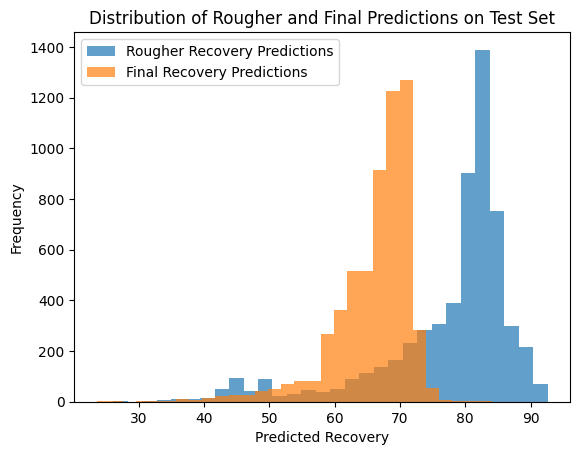

In [50]:
plt.hist(test_rf_rougher_preds, bins = 30, alpha = 0.7, label = 'Rougher Recovery Predictions')
plt.hist(test_rf_final_preds, bins = 30, alpha = 0.7, label = 'Final Recovery Predictions')
plt.title('Distribution of Rougher and Final Predictions on Test Set')
plt.xlabel('Predicted Recovery')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conclusion

Using my Random Forest Regression model, I was able to predict values for both Rougher and Final output recovery of the given test set. The histogram above shows a few key takeaways for the model and potentially the purification process. The first is that the values of rougher and final recovery rates tend to center around 83% and 67%, respectively, which could mean that our purification process isn't as efficient as we would like it to be. Next is that the model didn't predict any unrealistic (negative or over 100%) values, supporting it's reliability on unseen test data. Using these points we could feel confident that the model is performing well, but perhaps our purification process needs to be improved so that we could see further increase in recovery rate after the final purification step. To continue improving this model and bring the Final Test sMAPE value closer to 0, I could tune different hyperparameters or even test entirely different models to see how each compares with the test set. There is still plenty of work to be done to improve this model, which I hope to learn more about in the coming sprints!

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
The conclusion is written well!     
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed :) 
    
</div>